In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
def create_scatter_plots():
    """Generate summary files for the aggregate project."""
    sns.set_style("darkgrid")
    summary_df = pd.read_csv("aggregate_summary_all.csv")
    molecules = summary_df["molecule"]
    molecule_set = set(molecules)
    group_key = "molecule"
    g_list = []
    for molecule in molecule_set:
        try:
            mol_group = summary_df.groupby(group_key)
            mol_df = mol_group.get_group(molecule)
        except KeyError:
            print(f"skipping: {molecule}, no data available.")
            continue
        mol_df["statepoint"] = (
            summary_df["temperature"].map(str)
            + "K , "
            + summary_df["pressure"].map(str)
            + "kPa"
        )
        plt.clf()
        color_labels = mol_df["engine"].unique()
        palette = sns.color_palette("colorblind")
        color_map = dict(zip(color_labels, palette))
        for my_engine in color_labels:
            data = mol_df.loc[mol_df["engine"] == my_engine]
            ax = plt.scatter(
                x="statepoint",
                y="density-avg",
                data=data,
                color=color_map[my_engine],
                label=my_engine,
                s=5 * data["density-avg"],
            )
            plt.legend()
            plt.errorbar(
                x="statepoint",
                y="density-avg",
                data=data,
                ecolor=color_map[my_engine],
                yerr="density-sem",
                ls="none",
                fmt="none",
                barsabove=True,
                capsize=3,
                label="_no_label_",
            )
        val_min = mol_df["density-avg"].min()
        val_max = mol_df["density-avg"].max()
        #         g = sns.scatterplot(data=mol_df, x="statepoint", hue="engine",
        #                  y="density-avg", ci='None', style="engine" )
        #         g.map(plt.errorbar, "statepoint", "density-avg", "density-std", marker="o")
        plt.ylim(val_min - 0.005 * val_min, val_max + 0.005 * val_max)
        plt.title(molecule)
        plt.tight_layout()
        plt.savefig(f"{molecule}_summary_scatter.pdf")

In [ ]:
create_scatter_plots()

In [2]:
def create_bar_plots_sem():
    """Generate summary files for the aggregate project."""
    sns.set_style("whitegrid")
    summary_df = pd.read_csv("aggregate_summary_all.csv")
    molecules = summary_df["molecule"]
    molecule_set = set(molecules)
    group_key = "molecule"
    g_list = []
    for molecule in molecule_set:
        try:
            mol_group = summary_df.groupby(group_key)
            mol_df = mol_group.get_group(molecule)
        except KeyError:
            print(f"skipping: {molecule}, no data available.")
            continue
        mol_df["statepoint"] = (
            summary_df["temperature"].map(str)
            + "K , "
            + summary_df["pressure"].map(str)
            + "kPa"
        )
        sp_set = set(mol_df["statepoint"])
        for engine in mol_df["engine"].unique():
            found_sp = mol_df[mol_df["engine"] == engine].index.tolist()
            print(found_sp)
            if len(found_sp) == len(set(mol_df["statepoint"])):
                print(engine, "good!")
            else:
                print(engine, "bad")
                mol_df.drop(axis=0, labels=found_sp, inplace=True)

        display(mol_df)
        plt.clf()
        palette = sns.color_palette("colorblind")
        ax = sns.barplot(
            x="statepoint",
            y="density-avg",
            data=mol_df,
            linewidth=0.5,
            hue="engine",
            palette=palette,
            errcolor=".2",
            edgecolor=".2",
            ci="none",
        )
        x_list = []
        for patch in ax.patches:
            x_list.append(patch.get_xy()[0] + (patch._width / 2))
        val_min = mol_df["density-avg"].min()
        val_max = mol_df["density-avg"].max()
        val_sem_max = mol_df["density-sem"].max()
        val_sem_min = mol_df["density-sem"].min()
        print(val_min, val_max)
        print(x_list)
        ax.set(ylim=(val_min - 2*val_sem_max, val_max+2*val_sem_max))
        ax.set(ylabel=r"density $\rho$  $[\frac{g}{cm^3}]$", xlabel="statepoint")
        plt.errorbar(
            np.nan_to_num(x_list),
            np.nan_to_num(mol_df["density-avg"]),
            yerr=np.nan_to_num(2 * mol_df["density-sem"]),
            marker="None",
            mec="black",
            zorder=30,
            elinewidth=1.5,
            capsize=3,
            ecolor="black",
            linestyle="None",
            markersize=1,
        )
        plt.title(molecule + " 2-sem")
        plt.tight_layout()
        plt.savefig(f"{molecule}_summary_bar_2sem.pdf")

In [3]:
def create_bar_plots_std():
    """Generate summary files for the aggregate project."""
    sns.set_style("whitegrid")
    summary_df = pd.read_csv("aggregate_summary_all.csv")
    molecules = summary_df["molecule"]
    molecule_set = set(molecules)
    group_key = "molecule"
    g_list = []
    for molecule in molecule_set:
        try:
            mol_group = summary_df.groupby(group_key)
            mol_df = mol_group.get_group(molecule)
        except KeyError:
            print(f"skipping: {molecule}, no data available.")
            continue
        mol_df["statepoint"] = (
            summary_df["temperature"].map(str)
            + "K , "
            + summary_df["pressure"].map(str)
            + "kPa"
        )
        sp_set = set(mol_df["statepoint"])
        for engine in mol_df["engine"].unique():
            found_sp = mol_df[mol_df["engine"] == engine].index.tolist()
            print(found_sp)
            if len(found_sp) == len(set(mol_df["statepoint"])):
                print(engine, "good!")
            else:
                print(engine, "bad")
                mol_df.drop(axis=0, labels=found_sp, inplace=True)

        display(mol_df)
        plt.clf()
        palette = sns.color_palette("colorblind")
        ax = sns.barplot(
            x="statepoint",
            y="density-avg",
            data=mol_df,
            linewidth=0.5,
            hue="engine",
            palette=palette,
            errcolor=".2",
            edgecolor=".2",
            ci="none",
        )
        x_list = []
        for patch in ax.patches:
            x_list.append(patch.get_xy()[0] + (patch._width / 2))
        val_min = mol_df["density-avg"].min()
        val_max = mol_df["density-avg"].max()
        val_std_max = mol_df["density-std"].max()
        val_std_min = mol_df["density-std"].min()
        print(val_min, val_max)
        print(x_list)
        ax.set(ylim=(val_min - 2*val_std_max, val_max+2*val_std_max))
        ax.set(ylabel=r"density $\rho$  $[\frac{g}{cm^3}]$", xlabel="statepoint")
        plt.errorbar(
            x_list,
            mol_df["density-avg"],
            yerr=2 * mol_df["density-std"],
            marker="None",
            mec="black",
            zorder=30,
            elinewidth=1.5,
            capsize=3,
            ecolor="black",
            linestyle="None",
            markersize=1,
        )
        plt.title(molecule + " 2-std")
        plt.tight_layout()
        plt.savefig(f"{molecule}_summary_bar_2std.pdf")

[0]
cassandra good!
[1]
mcccs good!
[2]
gomc good!
[3]
gromacs good!
[4]
hoomd good!
[5]
lammps-VU good!


/var/folders/xd/gnqd22s118747f75syqkrwg00000gn/T/ipykernel_23297/811059278.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df["statepoint"] = (


,Unnamed: 0,molecule,engine,temperature,pressure,ensemble,forcefield_name,cutoff_style,long_range_correction,r_cut,...,temperature-avg,temperature-std,temperature-sem,potential_energy-avg,potential_energy-std,potential_energy-sem,density-avg,density-std,density-sem,statepoint
0,0,methaneUA,cassandra,140.0,1318.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,140.000000,0.000000,0.000000,-5695.189621,2.915553,0.728888,0.375724,0.000175,0.000044,"140.0K , 1318.0kPa"
1,1,methaneUA,mcccs,140.0,1318.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,0.000000,0.000000,0.000000,-5695.738793,3.029363,0.757341,0.375689,0.000184,0.000046,"140.0K , 1318.0kPa"
2,2,methaneUA,gomc,140.0,1318.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,140.000000,0.000000,0.000000,-685093.842160,208.002188,52.000547,0.375789,0.000117,0.000029,"140.0K , 1318.0kPa"
3,3,methaneUA,gromacs,140.0,1318.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,140.003768,0.051552,0.012888,-5698.862840,1.690795,0.422699,0.375956,0.000056,0.000014,"140.0K , 1318.0kPa"
4,4,methaneUA,hoomd,140.0,1318.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,139.990301,0.055264,0.013816,-5698.978935,1.537299,0.384325,0.375858,0.000085,0.000021,"140.0K , 1318.0kPa"
5,5,methaneUA,lammps-VU,140.0,1318.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,140.018731,0.069098,0.017275,-5699.011531,0.888377,0.222094,0.375972,0.000056,0.000014,"140.0K , 1318.0kPa"


0.375689094537191 0.3759717385014754
[-0.3333333333333333, -0.19999999999999996, -0.06666666666666658, 0.06666666666666676, 0.20000000000000012, 0.33333333333333337]
[6]
gromacs good!
[7]
hoomd good!
[8]
lammps-VU good!


/var/folders/xd/gnqd22s118747f75syqkrwg00000gn/T/ipykernel_23297/811059278.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df["statepoint"] = (


,Unnamed: 0,molecule,engine,temperature,pressure,ensemble,forcefield_name,cutoff_style,long_range_correction,r_cut,...,temperature-avg,temperature-std,temperature-sem,potential_energy-avg,potential_energy-std,potential_energy-sem,density-avg,density-std,density-sem,statepoint
6,6,pentaneUA-flexible_bonds,gromacs,372.0,1402.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,371.957339,0.154260,0.038565,-501.096058,11.931902,2.982976,0.533914,0.001305,0.000326,"372.0K , 1402.0kPa"
7,7,pentaneUA-flexible_bonds,hoomd,372.0,1402.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,370.072823,0.067535,0.016884,-579.970339,16.772690,4.193173,0.544434,0.001627,0.000407,"372.0K , 1402.0kPa"
8,8,pentaneUA-flexible_bonds,lammps-VU,372.0,1402.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,371.975347,0.208846,0.052212,-452.677918,15.456059,3.864015,0.543227,0.001856,0.000464,"372.0K , 1402.0kPa"


0.5339144389851077 0.5444344331662561
[-0.2666666666666667, 0.0, 0.2666666666666667]
[52]
gomc good!


/var/folders/xd/gnqd22s118747f75syqkrwg00000gn/T/ipykernel_23297/811059278.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df["statepoint"] = (


,Unnamed: 0,molecule,engine,temperature,pressure,ensemble,forcefield_name,cutoff_style,long_range_correction,r_cut,...,temperature-avg,temperature-std,temperature-sem,potential_energy-avg,potential_energy-std,potential_energy-sem,density-avg,density-std,density-sem,statepoint
52,52,pentaneUA,gomc,372.0,1402.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,372.0,0.0,0.0,-289476.530613,695.939964,173.984991,0.540849,0.000517,0.000129,"372.0K , 1402.0kPa"


0.5408493208791251 0.5408493208791251
[0.0]
[19, 20, 21]
mcccs good!
[22, 23, 24]
gomc good!
[25, 26, 27]
gromacs good!
[28, 29, 30]
hoomd good!
[31, 32, 33]
lammps-VU good!


/var/folders/xd/gnqd22s118747f75syqkrwg00000gn/T/ipykernel_23297/811059278.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df["statepoint"] = (


,Unnamed: 0,molecule,engine,temperature,pressure,ensemble,forcefield_name,cutoff_style,long_range_correction,r_cut,...,temperature-avg,temperature-std,temperature-sem,potential_energy-avg,potential_energy-std,potential_energy-sem,density-avg,density-std,density-sem,statepoint
19,19,waterSPCE,mcccs,280.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,0.000000,0.000000,0.000000,-5.274808e+04,41.683207,10.420802,1.006562,0.001710,0.000428,"280.0K , 101.325kPa"
20,20,waterSPCE,mcccs,300.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,0.000000,0.000000,0.000000,-5.137663e+04,19.409485,4.852371,0.997417,0.001141,0.000285,"300.0K , 101.325kPa"
21,21,waterSPCE,mcccs,320.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,0.000000,0.000000,0.000000,-5.003983e+04,16.460292,4.115073,0.986379,0.000920,0.000230,"320.0K , 101.325kPa"
22,22,waterSPCE,gomc,280.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,280.000000,0.000000,0.000000,-6.340789e+06,3976.241470,994.060368,1.006874,0.001648,0.000412,"280.0K , 101.325kPa"
23,23,waterSPCE,gomc,300.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,300.000000,0.000000,0.000000,-6.173561e+06,2376.258732,594.064683,0.997889,0.001193,0.000298,"300.0K , 101.325kPa"
24,24,waterSPCE,gomc,320.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,320.000000,0.000000,0.000000,-6.018772e+06,2242.856165,560.714041,0.986197,0.000822,0.000205,"320.0K , 101.325kPa"
25,25,waterSPCE,gromacs,280.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,279.985049,0.111965,0.027991,-5.275783e+04,5.120829,1.280207,1.006681,0.000169,0.000042,"280.0K , 101.325kPa"
26,26,waterSPCE,gromacs,300.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,299.996464,0.126819,0.031705,-5.137703e+04,6.366049,1.591512,0.997885,0.000109,0.000027,"300.0K , 101.325kPa"
27,27,waterSPCE,gromacs,320.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,319.989938,0.107113,0.026778,-5.004377e+04,3.449020,0.862255,0.986371,0.000139,0.000035,"320.0K , 101.325kPa"
28,28,waterSPCE,hoomd,280.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,279.537987,0.041431,0.010358,-5.274424e+04,4.920694,1.230174,1.006572,0.000176,0.000044,"280.0K , 101.325kPa"


0.9861967911254949 1.0068795721825756
[-0.32, 0.6799999999999999, 1.68, -0.15999999999999998, 0.84, 1.84, 0.0, 1.0, 2.0, 0.15999999999999998, 1.16, 2.16, 0.32, 1.32, 2.32]
[14]
cassandra good!
[15]
mcccs good!
[16]
gomc good!
[17]
hoomd good!
[18]
lammps-VU good!


/var/folders/xd/gnqd22s118747f75syqkrwg00000gn/T/ipykernel_23297/811059278.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df["statepoint"] = (


,Unnamed: 0,molecule,engine,temperature,pressure,ensemble,forcefield_name,cutoff_style,long_range_correction,r_cut,...,temperature-avg,temperature-std,temperature-sem,potential_energy-avg,potential_energy-std,potential_energy-sem,density-avg,density-std,density-sem,statepoint
14,14,benzeneUA,cassandra,450.0,2260.0,NPT,benzene-ua,hard,energy_pressure,1.4,...,450.000000,0.000000,0.000000,-8279.860781,10.994613,2.748653,0.698436,0.000972,0.000243,"450.0K , 2260.0kPa"
15,15,benzeneUA,mcccs,450.0,2260.0,NPT,benzene-ua,hard,energy_pressure,1.4,...,0.000000,0.000000,0.000000,-6025.866643,11.978553,2.994638,0.698252,0.000707,0.000177,"450.0K , 2260.0kPa"
16,16,benzeneUA,gomc,450.0,2260.0,NPT,benzene-ua,hard,energy_pressure,1.4,...,450.000000,0.000000,0.000000,-996248.505190,1104.689217,276.172304,0.698688,0.000817,0.000204,"450.0K , 2260.0kPa"
17,17,benzeneUA,hoomd,450.0,2260.0,NPT,benzene-ua,hard,energy_pressure,1.4,...,450.031549,0.107269,0.026817,-8268.853515,2.756902,0.689226,0.697398,0.000244,0.000061,"450.0K , 2260.0kPa"
18,18,benzeneUA,lammps-VU,450.0,2260.0,NPT,benzene-ua,hard,energy_pressure,1.4,...,450.592436,0.265067,0.066267,-8268.001036,3.859260,0.964815,0.697659,0.000319,0.000080,"450.0K , 2260.0kPa"


0.697397596184184 0.6986877138757969
[-0.32, -0.15999999999999998, 0.0, 0.15999999999999998, 0.32]
[34, 35, 36]
cassandra good!
[37, 38, 39]
mcccs good!
[40, 41, 42]
gomc good!
[43, 44, 45]
gromacs good!
[46, 47, 48]
hoomd good!
[49, 50, 51]
lammps-VU good!


/var/folders/xd/gnqd22s118747f75syqkrwg00000gn/T/ipykernel_23297/811059278.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df["statepoint"] = (


,Unnamed: 0,molecule,engine,temperature,pressure,ensemble,forcefield_name,cutoff_style,long_range_correction,r_cut,...,temperature-avg,temperature-std,temperature-sem,potential_energy-avg,potential_energy-std,potential_energy-sem,density-avg,density-std,density-sem,statepoint
34,34,ethanolAA,cassandra,280.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,280.000000,0.000000,0.000000,-1.098909e+04,39.155448,9.788862,0.813491,0.001335,0.000334,"280.0K , 101.325kPa"
35,35,ethanolAA,cassandra,300.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,300.000000,0.000000,0.000000,-9.618101e+03,23.642645,5.910661,0.791282,0.000883,0.000221,"300.0K , 101.325kPa"
36,36,ethanolAA,cassandra,320.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,320.000000,0.000000,0.000000,-8.211544e+03,24.794963,6.198741,0.768720,0.000847,0.000212,"320.0K , 101.325kPa"
37,37,ethanolAA,mcccs,280.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,0.000000,0.000000,0.000000,-1.099390e+04,24.567152,6.141788,0.813162,0.000745,0.000186,"280.0K , 101.325kPa"
38,38,ethanolAA,mcccs,300.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,0.000000,0.000000,0.000000,-9.633496e+03,22.694605,5.673651,0.791691,0.000782,0.000196,"300.0K , 101.325kPa"
39,39,ethanolAA,mcccs,320.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,0.000000,0.000000,0.000000,-8.215347e+03,24.758455,6.189614,0.768648,0.001029,0.000257,"320.0K , 101.325kPa"
40,40,ethanolAA,gomc,280.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,280.000000,0.000000,0.000000,-1.316410e+06,4920.244044,1230.061011,0.813131,0.001413,0.000353,"280.0K , 101.325kPa"
41,41,ethanolAA,gomc,300.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,300.000000,0.000000,0.000000,-1.153163e+06,4151.372411,1037.843103,0.791348,0.001326,0.000332,"300.0K , 101.325kPa"
42,42,ethanolAA,gomc,320.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,320.000000,0.000000,0.000000,-9.822206e+05,3957.009782,989.252446,0.768012,0.001174,0.000293,"320.0K , 101.325kPa"
43,43,ethanolAA,gromacs,280.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,279.988955,0.260901,0.065225,-7.045888e+03,22.953776,5.738444,0.816776,0.000240,0.000060,"280.0K , 101.325kPa"


0.7680116167513229 0.816776394186089
[-0.3333333333333333, 0.6666666666666667, 1.6666666666666667, -0.19999999999999996, 0.8, 1.8, -0.06666666666666658, 0.9333333333333333, 1.9333333333333333, 0.06666666666666676, 1.0666666666666669, 2.066666666666667, 0.20000000000000012, 1.2000000000000002, 2.2, 0.33333333333333337, 1.3333333333333335, 2.3333333333333335]
[9]
cassandra good!
[10]
mcccs good!
[11]
gomc good!
[12]
gromacs good!
[13]
hoomd good!


/var/folders/xd/gnqd22s118747f75syqkrwg00000gn/T/ipykernel_23297/811059278.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df["statepoint"] = (


,Unnamed: 0,molecule,engine,temperature,pressure,ensemble,forcefield_name,cutoff_style,long_range_correction,r_cut,...,temperature-avg,temperature-std,temperature-sem,potential_energy-avg,potential_energy-std,potential_energy-sem,density-avg,density-std,density-sem,statepoint
9,9,pentaneUA-constrain_bonds,cassandra,372.0,1402.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,372.000000,0.000000,0.000000,-2423.008361,8.612347,2.153087,0.541189,0.000850,0.000212,"372.0K , 1402.0kPa"
10,10,pentaneUA-constrain_bonds,mcccs,372.0,1402.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,0.000000,0.000000,0.000000,-2417.163109,4.053146,1.013286,0.541081,0.000346,0.000087,"372.0K , 1402.0kPa"
11,11,pentaneUA-constrain_bonds,gomc,372.0,1402.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,372.000000,0.000000,0.000000,-289476.530613,695.939964,173.984991,0.540849,0.000517,0.000129,"372.0K , 1402.0kPa"
12,12,pentaneUA-constrain_bonds,gromacs,372.0,1402.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,371.969571,0.126672,0.031668,-2425.979420,6.719676,1.679919,0.541901,0.000321,0.000080,"372.0K , 1402.0kPa"
13,13,pentaneUA-constrain_bonds,hoomd,372.0,1402.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,371.880574,0.169904,0.042476,-2426.950979,2.728225,0.682056,0.541990,0.000302,0.000075,"372.0K , 1402.0kPa"


0.540849320879125 0.5419898727782438
[-0.32, -0.15999999999999998, 0.0, 0.15999999999999998, 0.32]
[0]
cassandra good!
[1]
mcccs good!
[2]
gomc good!
[3]
gromacs good!
[4]
hoomd good!
[5]
lammps-VU good!


/var/folders/xd/gnqd22s118747f75syqkrwg00000gn/T/ipykernel_23297/3657963599.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df["statepoint"] = (


,Unnamed: 0,molecule,engine,temperature,pressure,ensemble,forcefield_name,cutoff_style,long_range_correction,r_cut,...,temperature-avg,temperature-std,temperature-sem,potential_energy-avg,potential_energy-std,potential_energy-sem,density-avg,density-std,density-sem,statepoint
0,0,methaneUA,cassandra,140.0,1318.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,140.000000,0.000000,0.000000,-5695.189621,2.915553,0.728888,0.375724,0.000175,0.000044,"140.0K , 1318.0kPa"
1,1,methaneUA,mcccs,140.0,1318.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,0.000000,0.000000,0.000000,-5695.738793,3.029363,0.757341,0.375689,0.000184,0.000046,"140.0K , 1318.0kPa"
2,2,methaneUA,gomc,140.0,1318.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,140.000000,0.000000,0.000000,-685093.842160,208.002188,52.000547,0.375789,0.000117,0.000029,"140.0K , 1318.0kPa"
3,3,methaneUA,gromacs,140.0,1318.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,140.003768,0.051552,0.012888,-5698.862840,1.690795,0.422699,0.375956,0.000056,0.000014,"140.0K , 1318.0kPa"
4,4,methaneUA,hoomd,140.0,1318.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,139.990301,0.055264,0.013816,-5698.978935,1.537299,0.384325,0.375858,0.000085,0.000021,"140.0K , 1318.0kPa"
5,5,methaneUA,lammps-VU,140.0,1318.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,140.018731,0.069098,0.017275,-5699.011531,0.888377,0.222094,0.375972,0.000056,0.000014,"140.0K , 1318.0kPa"


0.375689094537191 0.3759717385014754
[-0.3333333333333333, -0.19999999999999996, -0.06666666666666658, 0.06666666666666676, 0.20000000000000012, 0.33333333333333337]
[6]
gromacs good!
[7]
hoomd good!
[8]
lammps-VU good!


/var/folders/xd/gnqd22s118747f75syqkrwg00000gn/T/ipykernel_23297/3657963599.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df["statepoint"] = (


,Unnamed: 0,molecule,engine,temperature,pressure,ensemble,forcefield_name,cutoff_style,long_range_correction,r_cut,...,temperature-avg,temperature-std,temperature-sem,potential_energy-avg,potential_energy-std,potential_energy-sem,density-avg,density-std,density-sem,statepoint
6,6,pentaneUA-flexible_bonds,gromacs,372.0,1402.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,371.957339,0.154260,0.038565,-501.096058,11.931902,2.982976,0.533914,0.001305,0.000326,"372.0K , 1402.0kPa"
7,7,pentaneUA-flexible_bonds,hoomd,372.0,1402.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,370.072823,0.067535,0.016884,-579.970339,16.772690,4.193173,0.544434,0.001627,0.000407,"372.0K , 1402.0kPa"
8,8,pentaneUA-flexible_bonds,lammps-VU,372.0,1402.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,371.975347,0.208846,0.052212,-452.677918,15.456059,3.864015,0.543227,0.001856,0.000464,"372.0K , 1402.0kPa"


0.5339144389851077 0.5444344331662561
[-0.2666666666666667, 0.0, 0.2666666666666667]
[52]
gomc good!


/var/folders/xd/gnqd22s118747f75syqkrwg00000gn/T/ipykernel_23297/3657963599.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df["statepoint"] = (


,Unnamed: 0,molecule,engine,temperature,pressure,ensemble,forcefield_name,cutoff_style,long_range_correction,r_cut,...,temperature-avg,temperature-std,temperature-sem,potential_energy-avg,potential_energy-std,potential_energy-sem,density-avg,density-std,density-sem,statepoint
52,52,pentaneUA,gomc,372.0,1402.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,372.0,0.0,0.0,-289476.530613,695.939964,173.984991,0.540849,0.000517,0.000129,"372.0K , 1402.0kPa"


0.5408493208791251 0.5408493208791251
[0.0]
[19, 20, 21]
mcccs good!
[22, 23, 24]
gomc good!
[25, 26, 27]
gromacs good!
[28, 29, 30]
hoomd good!
[31, 32, 33]
lammps-VU good!


/var/folders/xd/gnqd22s118747f75syqkrwg00000gn/T/ipykernel_23297/3657963599.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df["statepoint"] = (


,Unnamed: 0,molecule,engine,temperature,pressure,ensemble,forcefield_name,cutoff_style,long_range_correction,r_cut,...,temperature-avg,temperature-std,temperature-sem,potential_energy-avg,potential_energy-std,potential_energy-sem,density-avg,density-std,density-sem,statepoint
19,19,waterSPCE,mcccs,280.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,0.000000,0.000000,0.000000,-5.274808e+04,41.683207,10.420802,1.006562,0.001710,0.000428,"280.0K , 101.325kPa"
20,20,waterSPCE,mcccs,300.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,0.000000,0.000000,0.000000,-5.137663e+04,19.409485,4.852371,0.997417,0.001141,0.000285,"300.0K , 101.325kPa"
21,21,waterSPCE,mcccs,320.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,0.000000,0.000000,0.000000,-5.003983e+04,16.460292,4.115073,0.986379,0.000920,0.000230,"320.0K , 101.325kPa"
22,22,waterSPCE,gomc,280.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,280.000000,0.000000,0.000000,-6.340789e+06,3976.241470,994.060368,1.006874,0.001648,0.000412,"280.0K , 101.325kPa"
23,23,waterSPCE,gomc,300.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,300.000000,0.000000,0.000000,-6.173561e+06,2376.258732,594.064683,0.997889,0.001193,0.000298,"300.0K , 101.325kPa"
24,24,waterSPCE,gomc,320.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,320.000000,0.000000,0.000000,-6.018772e+06,2242.856165,560.714041,0.986197,0.000822,0.000205,"320.0K , 101.325kPa"
25,25,waterSPCE,gromacs,280.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,279.985049,0.111965,0.027991,-5.275783e+04,5.120829,1.280207,1.006681,0.000169,0.000042,"280.0K , 101.325kPa"
26,26,waterSPCE,gromacs,300.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,299.996464,0.126819,0.031705,-5.137703e+04,6.366049,1.591512,0.997885,0.000109,0.000027,"300.0K , 101.325kPa"
27,27,waterSPCE,gromacs,320.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,319.989938,0.107113,0.026778,-5.004377e+04,3.449020,0.862255,0.986371,0.000139,0.000035,"320.0K , 101.325kPa"
28,28,waterSPCE,hoomd,280.0,101.325,NPT,spce,hard,energy_pressure,0.9,...,279.537987,0.041431,0.010358,-5.274424e+04,4.920694,1.230174,1.006572,0.000176,0.000044,"280.0K , 101.325kPa"


0.9861967911254949 1.0068795721825756
[-0.32, 0.6799999999999999, 1.68, -0.15999999999999998, 0.84, 1.84, 0.0, 1.0, 2.0, 0.15999999999999998, 1.16, 2.16, 0.32, 1.32, 2.32]
[14]
cassandra good!
[15]
mcccs good!
[16]
gomc good!
[17]
hoomd good!
[18]
lammps-VU good!


/var/folders/xd/gnqd22s118747f75syqkrwg00000gn/T/ipykernel_23297/3657963599.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df["statepoint"] = (


,Unnamed: 0,molecule,engine,temperature,pressure,ensemble,forcefield_name,cutoff_style,long_range_correction,r_cut,...,temperature-avg,temperature-std,temperature-sem,potential_energy-avg,potential_energy-std,potential_energy-sem,density-avg,density-std,density-sem,statepoint
14,14,benzeneUA,cassandra,450.0,2260.0,NPT,benzene-ua,hard,energy_pressure,1.4,...,450.000000,0.000000,0.000000,-8279.860781,10.994613,2.748653,0.698436,0.000972,0.000243,"450.0K , 2260.0kPa"
15,15,benzeneUA,mcccs,450.0,2260.0,NPT,benzene-ua,hard,energy_pressure,1.4,...,0.000000,0.000000,0.000000,-6025.866643,11.978553,2.994638,0.698252,0.000707,0.000177,"450.0K , 2260.0kPa"
16,16,benzeneUA,gomc,450.0,2260.0,NPT,benzene-ua,hard,energy_pressure,1.4,...,450.000000,0.000000,0.000000,-996248.505190,1104.689217,276.172304,0.698688,0.000817,0.000204,"450.0K , 2260.0kPa"
17,17,benzeneUA,hoomd,450.0,2260.0,NPT,benzene-ua,hard,energy_pressure,1.4,...,450.031549,0.107269,0.026817,-8268.853515,2.756902,0.689226,0.697398,0.000244,0.000061,"450.0K , 2260.0kPa"
18,18,benzeneUA,lammps-VU,450.0,2260.0,NPT,benzene-ua,hard,energy_pressure,1.4,...,450.592436,0.265067,0.066267,-8268.001036,3.859260,0.964815,0.697659,0.000319,0.000080,"450.0K , 2260.0kPa"


0.697397596184184 0.6986877138757969
[-0.32, -0.15999999999999998, 0.0, 0.15999999999999998, 0.32]
[34, 35, 36]
cassandra good!
[37, 38, 39]
mcccs good!
[40, 41, 42]
gomc good!
[43, 44, 45]
gromacs good!
[46, 47, 48]
hoomd good!
[49, 50, 51]
lammps-VU good!


/var/folders/xd/gnqd22s118747f75syqkrwg00000gn/T/ipykernel_23297/3657963599.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df["statepoint"] = (


,Unnamed: 0,molecule,engine,temperature,pressure,ensemble,forcefield_name,cutoff_style,long_range_correction,r_cut,...,temperature-avg,temperature-std,temperature-sem,potential_energy-avg,potential_energy-std,potential_energy-sem,density-avg,density-std,density-sem,statepoint
34,34,ethanolAA,cassandra,280.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,280.000000,0.000000,0.000000,-1.098909e+04,39.155448,9.788862,0.813491,0.001335,0.000334,"280.0K , 101.325kPa"
35,35,ethanolAA,cassandra,300.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,300.000000,0.000000,0.000000,-9.618101e+03,23.642645,5.910661,0.791282,0.000883,0.000221,"300.0K , 101.325kPa"
36,36,ethanolAA,cassandra,320.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,320.000000,0.000000,0.000000,-8.211544e+03,24.794963,6.198741,0.768720,0.000847,0.000212,"320.0K , 101.325kPa"
37,37,ethanolAA,mcccs,280.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,0.000000,0.000000,0.000000,-1.099390e+04,24.567152,6.141788,0.813162,0.000745,0.000186,"280.0K , 101.325kPa"
38,38,ethanolAA,mcccs,300.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,0.000000,0.000000,0.000000,-9.633496e+03,22.694605,5.673651,0.791691,0.000782,0.000196,"300.0K , 101.325kPa"
39,39,ethanolAA,mcccs,320.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,0.000000,0.000000,0.000000,-8.215347e+03,24.758455,6.189614,0.768648,0.001029,0.000257,"320.0K , 101.325kPa"
40,40,ethanolAA,gomc,280.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,280.000000,0.000000,0.000000,-1.316410e+06,4920.244044,1230.061011,0.813131,0.001413,0.000353,"280.0K , 101.325kPa"
41,41,ethanolAA,gomc,300.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,300.000000,0.000000,0.000000,-1.153163e+06,4151.372411,1037.843103,0.791348,0.001326,0.000332,"300.0K , 101.325kPa"
42,42,ethanolAA,gomc,320.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,320.000000,0.000000,0.000000,-9.822206e+05,3957.009782,989.252446,0.768012,0.001174,0.000293,"320.0K , 101.325kPa"
43,43,ethanolAA,gromacs,280.0,101.325,NPT,oplsaa,hard,energy_pressure,1.0,...,279.988955,0.260901,0.065225,-7.045888e+03,22.953776,5.738444,0.816776,0.000240,0.000060,"280.0K , 101.325kPa"


0.7680116167513229 0.816776394186089
[-0.3333333333333333, 0.6666666666666667, 1.6666666666666667, -0.19999999999999996, 0.8, 1.8, -0.06666666666666658, 0.9333333333333333, 1.9333333333333333, 0.06666666666666676, 1.0666666666666669, 2.066666666666667, 0.20000000000000012, 1.2000000000000002, 2.2, 0.33333333333333337, 1.3333333333333335, 2.3333333333333335]
[9]
cassandra good!
[10]
mcccs good!
[11]
gomc good!
[12]
gromacs good!
[13]
hoomd good!


/var/folders/xd/gnqd22s118747f75syqkrwg00000gn/T/ipykernel_23297/3657963599.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mol_df["statepoint"] = (


,Unnamed: 0,molecule,engine,temperature,pressure,ensemble,forcefield_name,cutoff_style,long_range_correction,r_cut,...,temperature-avg,temperature-std,temperature-sem,potential_energy-avg,potential_energy-std,potential_energy-sem,density-avg,density-std,density-sem,statepoint
9,9,pentaneUA-constrain_bonds,cassandra,372.0,1402.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,372.000000,0.000000,0.000000,-2423.008361,8.612347,2.153087,0.541189,0.000850,0.000212,"372.0K , 1402.0kPa"
10,10,pentaneUA-constrain_bonds,mcccs,372.0,1402.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,0.000000,0.000000,0.000000,-2417.163109,4.053146,1.013286,0.541081,0.000346,0.000087,"372.0K , 1402.0kPa"
11,11,pentaneUA-constrain_bonds,gomc,372.0,1402.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,372.000000,0.000000,0.000000,-289476.530613,695.939964,173.984991,0.540849,0.000517,0.000129,"372.0K , 1402.0kPa"
12,12,pentaneUA-constrain_bonds,gromacs,372.0,1402.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,371.969571,0.126672,0.031668,-2425.979420,6.719676,1.679919,0.541901,0.000321,0.000080,"372.0K , 1402.0kPa"
13,13,pentaneUA-constrain_bonds,hoomd,372.0,1402.0,NPT,trappe-ua,hard,energy_pressure,1.4,...,371.880574,0.169904,0.042476,-2426.950979,2.728225,0.682056,0.541990,0.000302,0.000075,"372.0K , 1402.0kPa"


0.540849320879125 0.5419898727782438
[-0.32, -0.15999999999999998, 0.0, 0.15999999999999998, 0.32]


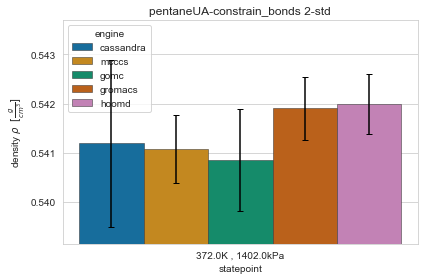

In [4]:
create_bar_plots_sem()
create_bar_plots_std()